In [1]:
Fs = 16000
sr = 16000
n_fft = 1024
n_mfcc = 64
hop_length = 512
win_length = 1024

In [2]:
%cd /content/drive/MyDrive/Spectrograms_xx

/content/drive/MyDrive/Spectrograms_xx


In [3]:
import numpy as np
import librosa
import os

In [4]:

def stft_to_mfcc(x,Fs,n_mfcc):
    x_mfcc = []
    xt = x.T
    for i in range(0,312,4):
        mfcc = librosa.feature.mfcc(S = xt[:][i:i+4].T, sr = Fs, n_mfcc = n_mfcc)
        if(len(mfcc[0])*(len(mfcc))==64*4):
            x_mfcc.append(mfcc)
        # if(len(x_mfcc[0])==78):break
    return np.array(x_mfcc)

In [5]:
X_music=[]
for i in range(1,90):
  if i!=19:
    x = np.load('Music/music_{num}_.npy'.format(num=i))
    x_mfcc = stft_to_mfcc(x,Fs,n_mfcc)
    for j in range(x_mfcc.shape[0]):
      X_music.append(x_mfcc[j])



X_music = np.array(X_music)

In [6]:
X_music.shape

(6848, 64, 4)

In [7]:
X_speech=[]
for i in range(1,90):
  x = np.load('Speech/speech_{num}_.npy'.format(num=i))
  x_mfcc = stft_to_mfcc(x,Fs,n_mfcc)
  for j in range(x_mfcc.shape[0]):
    X_speech.append(x_mfcc[j])
  
X_speech = np.array(X_speech)

In [8]:
X_speech.shape

(6818, 64, 4)

In [9]:
X_silence=[]
for i in range(1,51):
  if i<10:
    x = np.load('Silence/silence_0{num}_.npy'.format(num=i))
  else:
    x = np.load('Silence/silence_{num}_.npy'.format(num=i))
  x_mfcc = stft_to_mfcc(x,Fs,n_mfcc)
  for j in range(x_mfcc.shape[0]):
    X_silence.append(x_mfcc[j])

X_silence = np.array(X_silence)

In [10]:
X_silence.shape

(3900, 64, 4)

In [11]:
X = []
Y = []

for i in range(X_music.shape[0]):
  X.append(X_music[i])
  Y.append([1,0,0])

for i in range(X_speech.shape[0]):
  X.append(X_speech[i])
  Y.append([0,1,0])

for i in range(X_silence.shape[0]):
  X.append(X_silence[i])
  Y.append([0,0,1])


X = np.array(X)
Y = np.array(Y)

In [12]:
Y.shape

(17566, 3)

In [13]:
from sklearn.model_selection import train_test_split

In [14]:
 X_train, X_val, Y_train, Y_val = train_test_split(X, Y, test_size=0.15, random_state=3)

In [15]:
import pandas as pd
import numpy as np
import os
from keras.models import Sequential
from keras.layers import Dense, Dropout, Activation, Flatten,LSTM,TimeDistributed
from keras.layers import Convolution2D, MaxPooling2D,MaxPooling1D,Conv1D
from tensorflow.keras.optimizers import Adam,SGD
from keras.utils import np_utils
from sklearn import metrics
import random
from keras.callbacks import EarlyStopping, ModelCheckpoint
from keras import optimizers
import datetime
from sklearn.model_selection import train_test_split
import tensorflow as tf


In [16]:
model = Sequential()

model.add(LSTM(64,input_shape=(64,4),return_sequences=True))
model.add(LSTM(64))

model.add(Dense(64,activation='relu'))
model.add(Dropout(0.3))

model.add(Dense(3,activation='softmax'))

model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 lstm (LSTM)                 (None, 64, 64)            17664     
                                                                 
 lstm_1 (LSTM)               (None, 64)                33024     
                                                                 
 dense (Dense)               (None, 64)                4160      
                                                                 
 dropout (Dropout)           (None, 64)                0         
                                                                 
 dense_1 (Dense)             (None, 3)                 195       
                                                                 
Total params: 55,043
Trainable params: 55,043
Non-trainable params: 0
_________________________________________________________________


In [17]:
model.compile(optimizer='adam',
              loss='CategoricalCrossentropy',
              metrics=['accuracy'])

history = model.fit(X_train, Y_train, epochs=20,batch_size=12,validation_data=(X_val,Y_val))

Epoch 1/20
1245/1245 [==============================] - 49s 33ms/step - loss: 0.2923 - accuracy: 0.8961 - val_loss: 0.1435 - val_accuracy: 0.9507
Epoch 2/20
1245/1245 [==============================] - 40s 32ms/step - loss: 0.1260 - accuracy: 0.9604 - val_loss: 0.1119 - val_accuracy: 0.9658
Epoch 3/20
1245/1245 [==============================] - 40s 32ms/step - loss: 0.1056 - accuracy: 0.9672 - val_loss: 0.0800 - val_accuracy: 0.9750
Epoch 4/20
1245/1245 [==============================] - 40s 32ms/step - loss: 0.0726 - accuracy: 0.9782 - val_loss: 0.0765 - val_accuracy: 0.9734
Epoch 5/20
1245/1245 [==============================] - 40s 32ms/step - loss: 0.0592 - accuracy: 0.9816 - val_loss: 0.0491 - val_accuracy: 0.9841
Epoch 6/20
1245/1245 [==============================] - 40s 32ms/step - loss: 0.0555 - accuracy: 0.9839 - val_loss: 0.0508 - val_accuracy: 0.9837
Epoch 7/20
1245/1245 [==============================] - 40s 32ms/step - loss: 0.0505 - accuracy: 0.9848 - val_loss: 0.0653 -

In [21]:
def plot_loss(history):
  plt.plot(history.history['loss'], label='loss')
  plt.plot(history.history['val_loss'], label='val_loss')
  plt.ylim([0, 10])
  plt.xlabel('Epoch')
  plt.ylabel('Error')
  plt.legend()
  plt.grid(True)

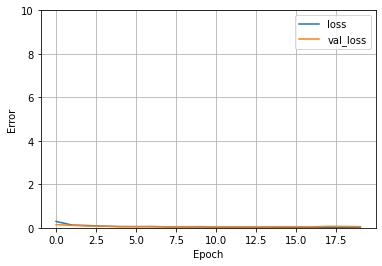

In [22]:
plot_loss(history)

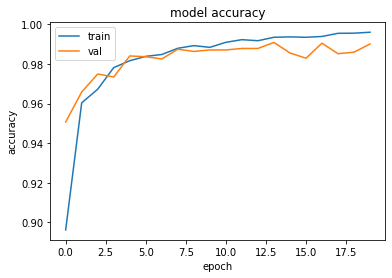

In [25]:
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.title('model accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['train', 'val'], loc='upper left')
plt.show()